In [ ]:
!pip3 install emnist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from emnist import extract_training_samples, extract_test_samples
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

images_train, labels_train = extract_training_samples('balanced')
images_test, labels_test = extract_test_samples('balanced')


# kiem tra so nhan cua tap train va test
print(set(labels_train))

x_train = []
y_train = [y for y in labels_train if y < 36]
for i in range(len(labels_train)):
    if(labels_train[i]<36):
        x_train.append(images_train[i])
x_train = np.asarray(x_train)


x_test = []
y_test = []
for i in range(len(labels_test)):
    if(labels_test[i]<36):
        x_test.append(images_test[i])
        y_test.append(labels_test[i])
x_test = np.asarray(x_test)


print(x_train.shape)
print(len(y_train))
print(x_test.shape)
print(len(y_test))

Using TensorFlow backend.


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
(86400, 28, 28)
86400
(14400, 28, 28)
14400


16


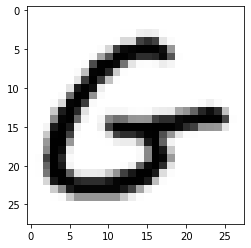

In [ ]:
import matplotlib.pyplot as plt
import random
# %matplotlib inline # Only use this if using iPython
image_index = random.randint(0, 100) # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
Y_train = np_utils.to_categorical(y_train, 36)
Y_test = np_utils.to_categorical(y_test, 36)

In [ ]:
X, X_val, Y, Y_val = train_test_split(x_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
batch_size = 32
num_classes = 36
input_shape = (28, 28, 1)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3, 3),padding='same', activation='relu'))
model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
H = model.fit(X, Y, validation_data = (X_val, Y_val) , batch_size = 32, epochs = 22)
model.save('/content/drive/My Drive/Data mining/model.hdf5')

Epoch 1/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.6493 - accuracy: 0.7919 - val_loss: 0.2862 - val_accuracy: 0.8960
Epoch 2/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.3461 - accuracy: 0.8752 - val_loss: 0.2666 - val_accuracy: 0.8996
Epoch 3/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.3018 - accuracy: 0.8884 - val_loss: 0.2459 - val_accuracy: 0.9042
Epoch 4/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.2738 - accuracy: 0.8955 - val_loss: 0.2323 - val_accuracy: 0.9109
Epoch 5/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.2588 - accuracy: 0.9010 - val_loss: 0.2258 - val_accuracy: 0.9131
Epoch 6/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.2461 - accuracy: 0.9036 - val_loss: 0.2248 - val_accuracy: 0.9138
Epoch 7/22
2160/2160 [==============================] - 9s 4ms/step - loss: 0.2359 - accuracy: 0.9088 - val_loss: 0.2280 - val_accuracy:

In [ ]:
model.load_weights('/content/drive/My Drive/Data mining/model.hdf5')

In [ ]:
model.evaluate(x_test, Y_test)

450/450 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9222


[0.23342712223529816, 0.9222221970558167]

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
y_pred = []
for pred in Y_pred:
  y_pred.append(pred.argmax())
y_pred = np.array(y_pred)
y_pred

array([ 9, 26, 33, ..., 21, 26, 33])

In [ ]:
from sklearn.metrics import classification_report

print("res", classification_report(y_test, y_pred))

# for i in range(len(le.classes_)):
#     print(str(i), end = ":")
#     print(le.classes_[i], end = "\n")

res               precision    recall  f1-score   support

           0       0.67      0.77      0.72       400
           1       0.58      0.62      0.60       400
           2       0.90      0.94      0.92       400
           3       0.99      0.98      0.99       400
           4       0.95      0.94      0.95       400
           5       0.96      0.88      0.92       400
           6       0.98      0.97      0.98       400
           7       0.98      0.98      0.98       400
           8       0.98      0.98      0.98       400
           9       0.98      0.99      0.99       400
          10       0.99      0.98      0.98       400
          11       0.98      0.98      0.98       400
          12       0.99      0.98      0.98       400
          13       0.92      0.94      0.93       400
          14       1.00      0.99      0.99       400
          15       0.98      0.98      0.98       400
          16       0.96      0.96      0.96       400
          17       0.97

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[308,   0,   0, ...,   0,   0,   0],
       [  0, 250,   0, ...,   0,   0,   1],
       [  0,   0, 378, ...,   1,   0,  17],
       ...,
       [  0,   0,   3, ..., 387,   4,   0],
       [  0,   0,   1, ...,   0, 382,   0],
       [  0,   0,  34, ...,   0,   0, 360]])

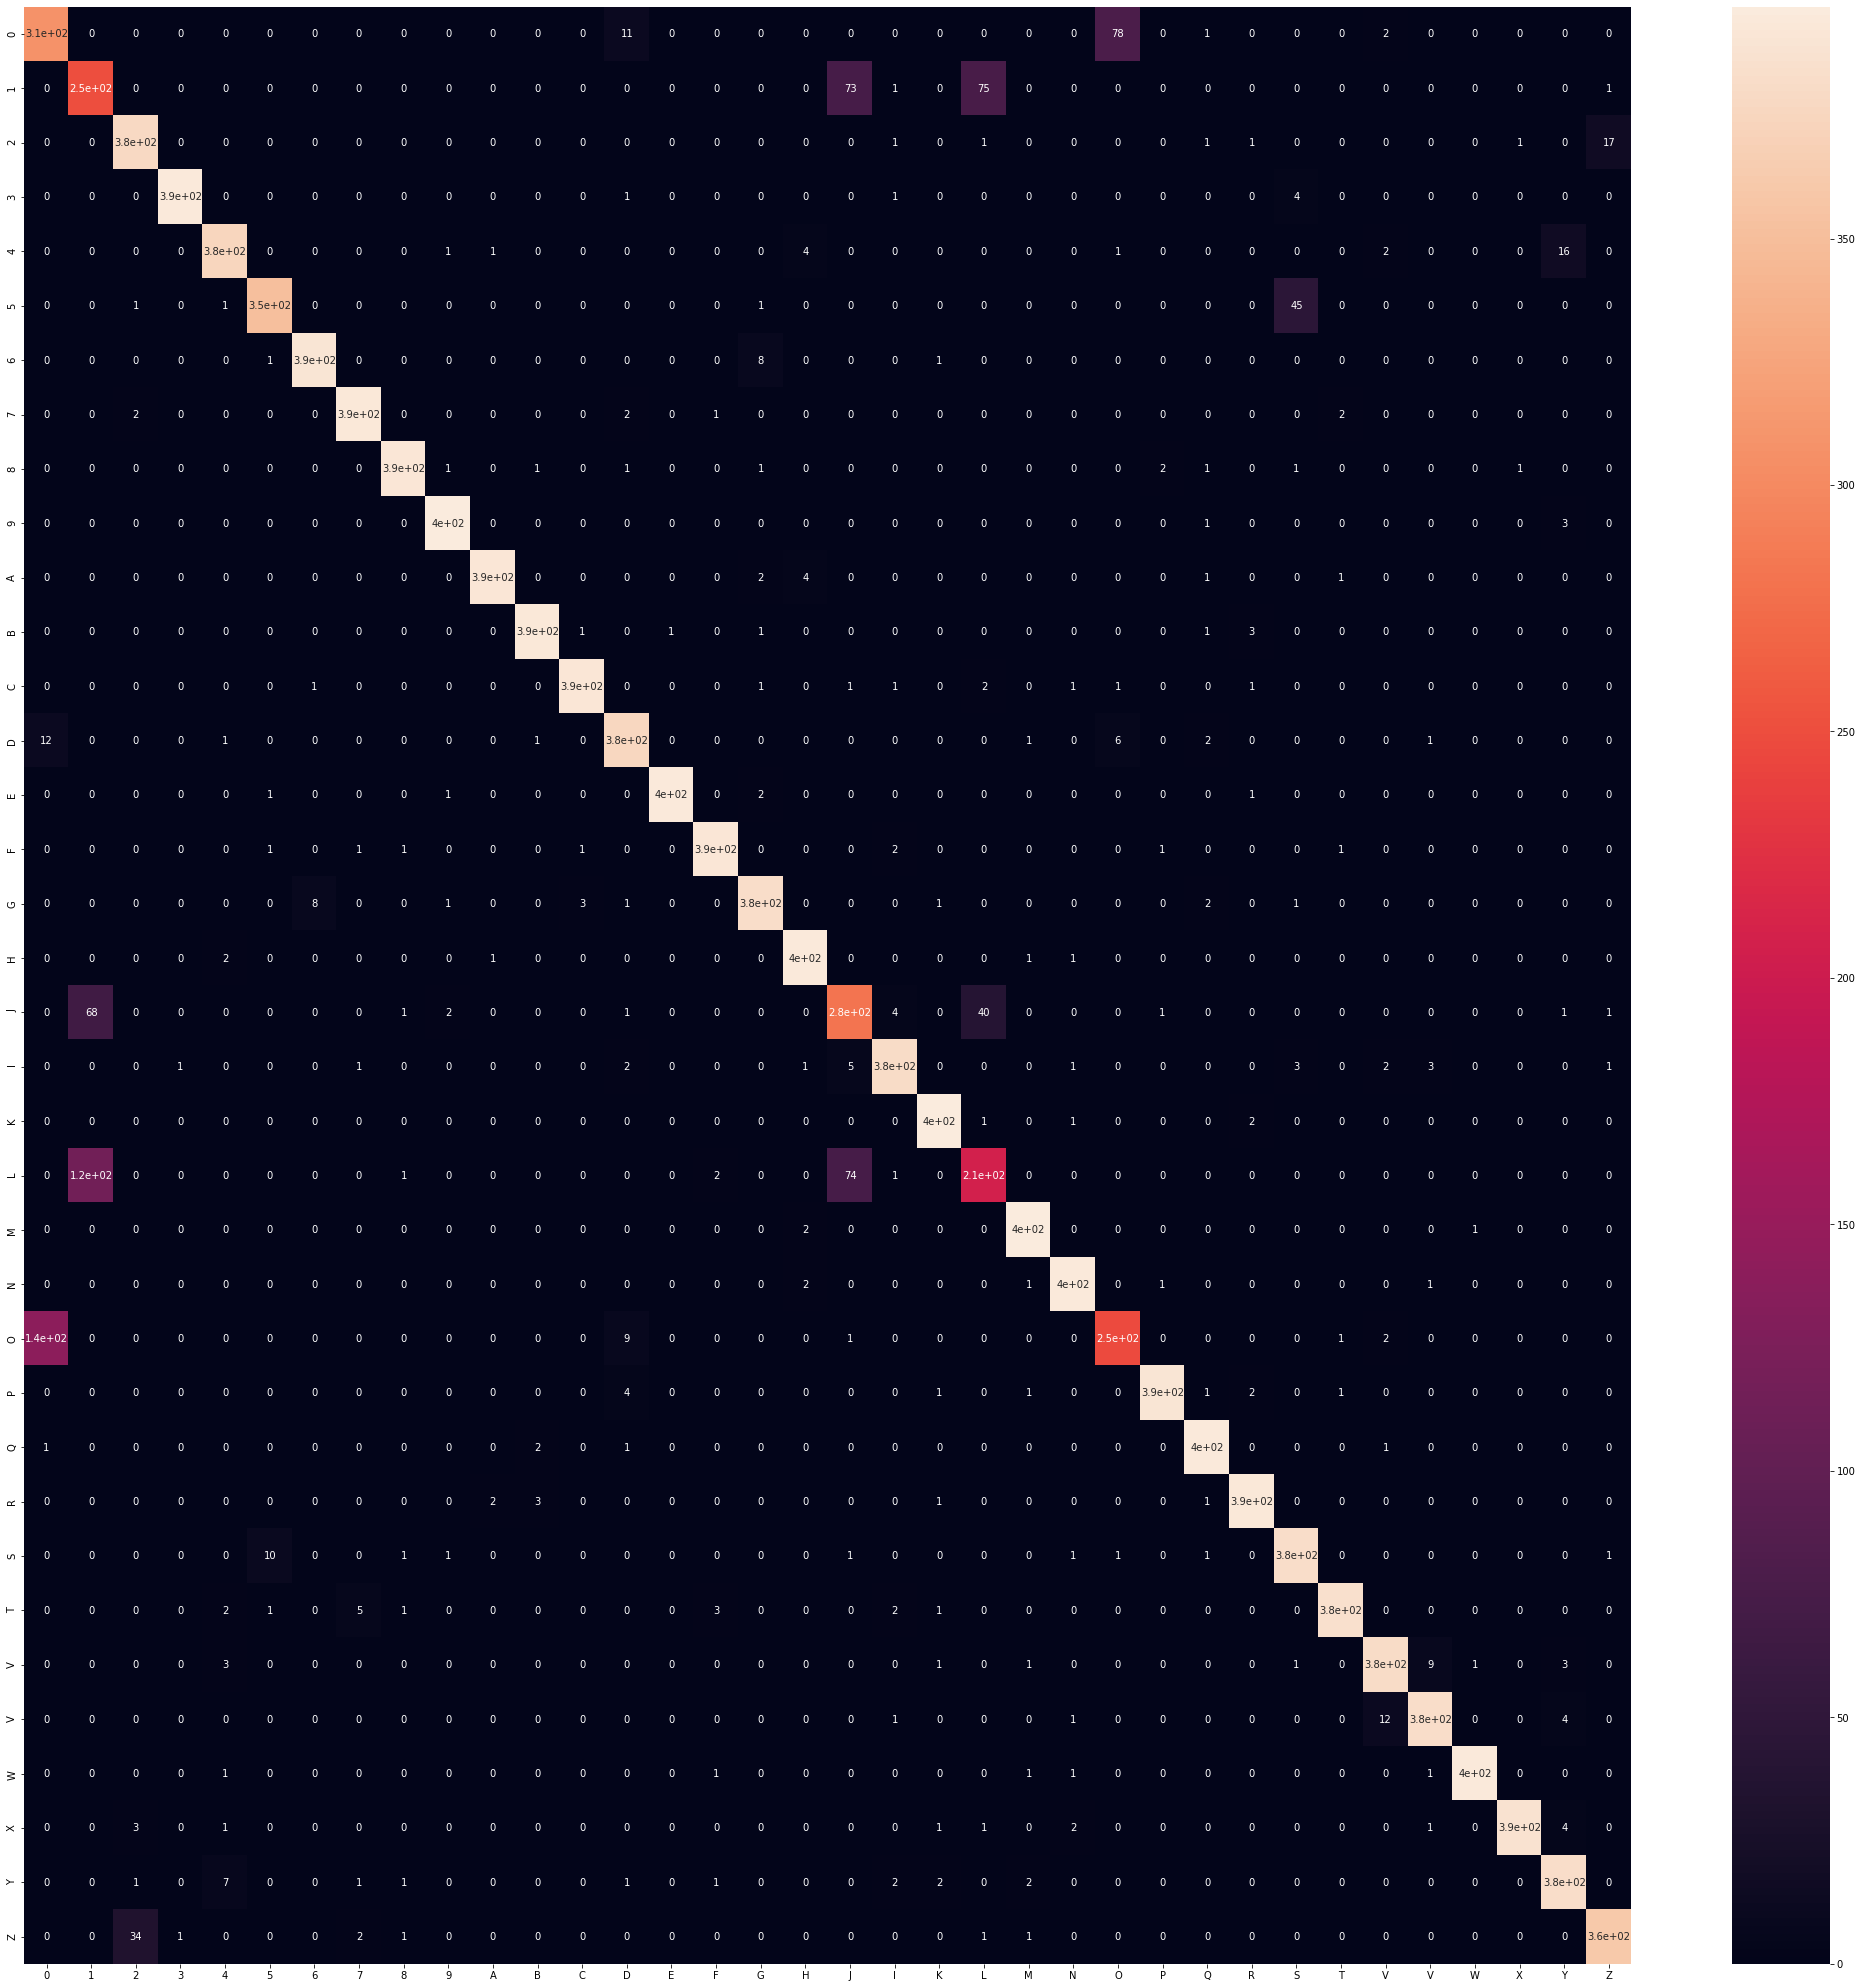

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf, index = [i for i in "0123456789ABCDEFGHJIKLMNOPQRSTVVWXYZ"],
                  columns = [i for i in "0123456789ABCDEFGHJIKLMNOPQRSTVVWXYZ"])
plt.figure(figsize = (36,36))
sn.heatmap(df_cm, annot=True)